# **INTRODUCCIÓN**

El presente estudio tiene como propósito analizar la evolución del consumo de energía per cápita en los países de América del Sur durante el período 1980–2013, así como su relación con el Producto Interno Bruto (PIB) per cápita, considerado un indicador representativo del nivel de desarrollo económico. Este enfoque permitirá examinar si el crecimiento económico de la región ha estado acompañado de un aumento proporcional en el uso de energía, o si, por el contrario, existen patrones de eficiencia y desigualdad entre los países.

In [ ]:
### para exportar pdf sin celdas de codigo, ejecutar en el cmd del sistema:

## cd C:\Users\User\Desktop\RICARDO UNIVERSIDAD\Equipo-4-computacion-II\Informe Dinámico

### python -m jupyter nbconvert --to pdf --template latex --no-input informe.ipynb

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Primeras 10 filas de la base de datos:**

In [125]:
#leer la base de datos en formato csv 

csv = ('https://raw.githubusercontent.com/arb28/Equipo'
       '-4-computacion-II/refs/heads/main/Limpieza%20de%20datos/Datos.csv')

df = pd.read_csv(csv)

#centrar la tabla
df.to_latex(index=False, float_format="%.2f", position="center")


pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_ 

#lista de países seleccionados
paises_seleccionados = [
    "Argentina", "Bolivia", "Brasil", "Chile", "Colombia",
    "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela"
]

#filtrar el DataFrame para conservar solo esos países
df = df[df["País"].isin(paises_seleccionados)]

#reiniciar el índice 
df = df.reset_index(drop=True).round(2)
df1 = df.astype(str)
#mostrar primeras 5 filas del csv
df1.head(10)

,Código,País,Año,Energía per cápita,PIB per cápita
0,ARG,Argentina,1980,1491.92,nan
1,ARG,Argentina,1981,1434.06,nan
2,ARG,Argentina,1982,1420.03,nan
3,ARG,Argentina,1983,1423.68,3727.05
4,ARG,Argentina,1984,1452.12,3787.47
5,ARG,Argentina,1985,1365.23,2919.28
6,ARG,Argentina,1986,1426.58,3454.3
7,ARG,Argentina,1987,1482.25,3492.69
8,ARG,Argentina,1988,1509.79,4005.2
9,ARG,Argentina,1989,1445.86,2382.34


# **Descripción de la evolución del consumo de energía per cápita en los países de América del Sur entre 1980 y 2013.**

In [111]:
#filtrado para ver el promedio de energía per capita en los años seleccionados
desc = df.groupby("Año")["Energía per cápita"].mean().reset_index().round(2)


pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "{%s}" % self.to_latex()

pd._repr_latex_ = _repr_latex_ 

years_list = [1980, 1990, 2000, 2010]

desc = desc.query('Año in @years_list')
desc1 = desc.astype(str)
desc1

,Año,Energía per cápita
0,1980,933.12
10,1990,900.2
20,2000,1052.83
30,2010,1229.02


En esta tabla donde se ve el promedio de energía per cápita media en Kg de petróleo, en las decadas respectivas para visualizar mejor el progreso de esta medida, podemos ver que aumenta a medida que los años pasan, evidentemente. Sin embargo, en el siguiente gráfico de lineas podemos apreciarlo mejor:

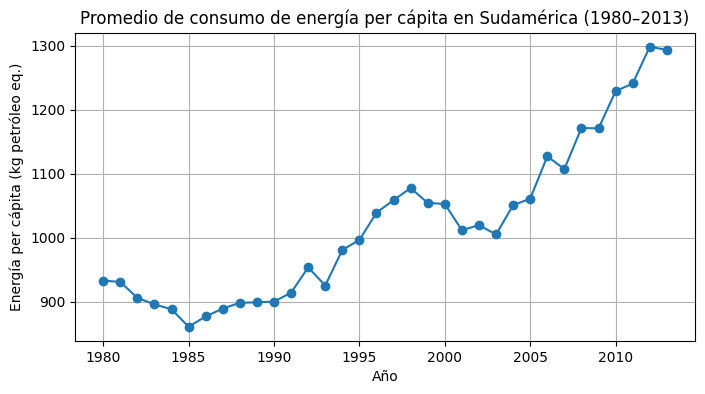

In [83]:

# Gráfico de tendencia temporal (promedio anual)
df.groupby("Año")["Energía per cápita"].mean().plot(figsize=(8,4), marker="o")
plt.title("Promedio de consumo de energía per cápita en Sudamérica (1980–2013)")
plt.xlabel("Año")
plt.ylabel("Energía per cápita (kg petróleo eq.)")
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9164\3841848146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


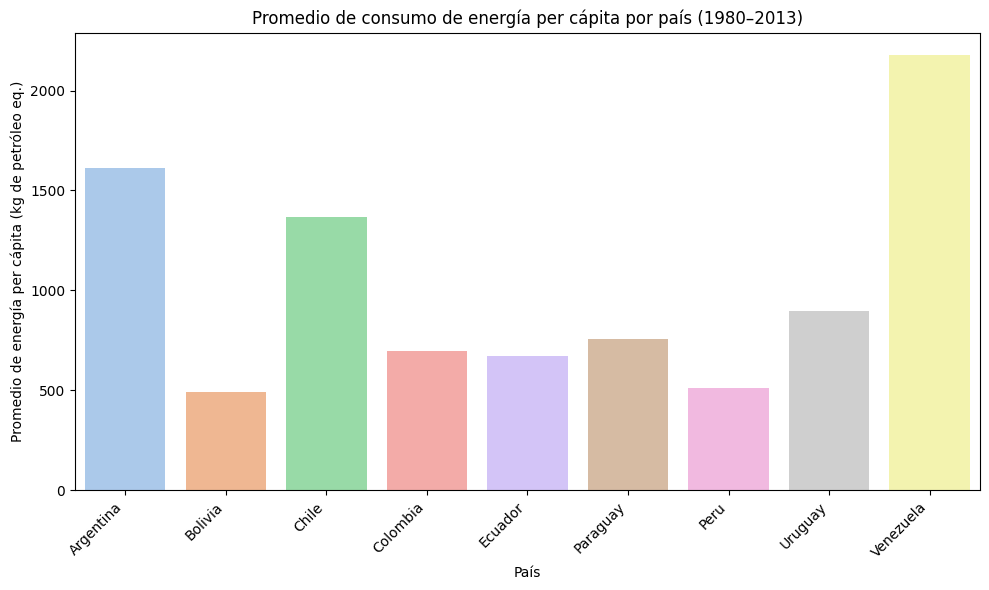

In [92]:
promedios = df.groupby("País")["Energía per cápita"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="País",
    y="Energía per cápita",
    data=promedios,
    palette="pastel"
)
plt.title("Promedio de consumo de energía per cápita por país (1980–2013)")
plt.xlabel("País")
plt.ylabel("Promedio de energía per cápita (kg de petróleo eq.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_9164\53850510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


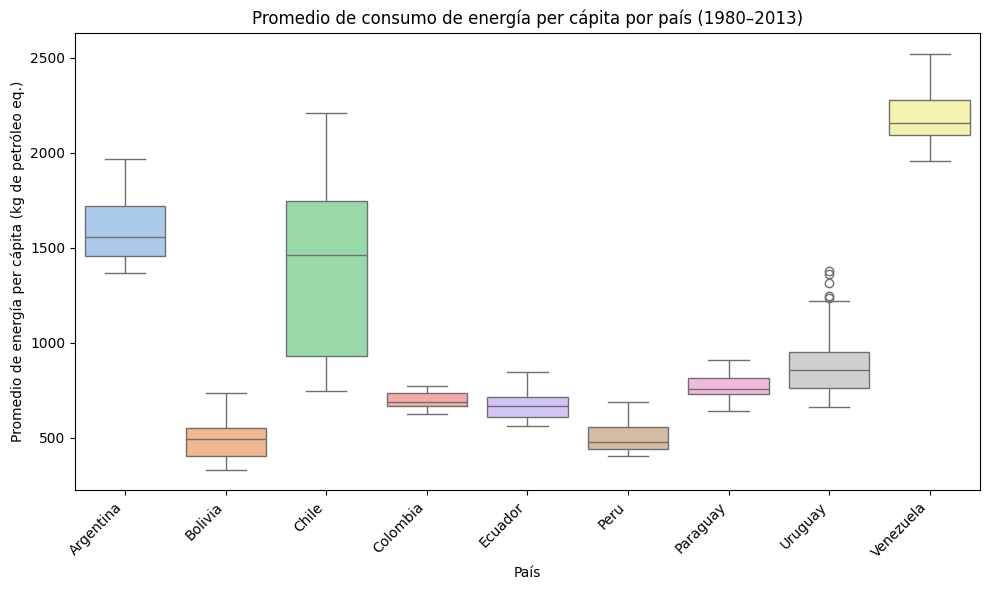

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="País",
    y="Energía per cápita",
    data=df,
    palette="pastel"
)
plt.title("Promedio de consumo de energía per cápita por país (1980–2013)")
plt.xlabel("País")
plt.ylabel("Promedio de energía per cápita (kg de petróleo eq.)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


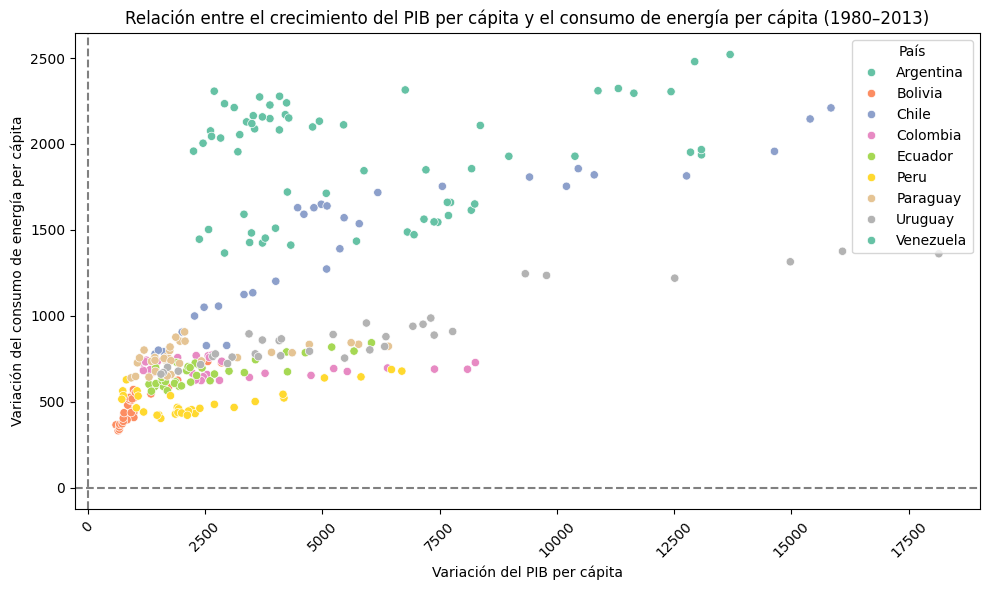

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PIB per cápita", y="Energía per cápita", hue="País", palette="Set2")

# Título y etiquetas
plt.title("Relación entre el crecimiento del PIB per cápita y el consumo de energía per cápita (1980–2013)")
plt.xlabel("Variación del PIB per cápita")
plt.ylabel("Variación del consumo de energía per cápita")
plt.axhline(0, color='gray', linestyle='--')  # Línea horizontal para ver los crecimientos y decrecimientos
plt.axvline(0, color='gray', linestyle='--')  # Línea vertical para lo mismo
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
correlacion = df[["PIB per cápita", "Energía per cápita"]].corr()

# Mostrar el valor de la correlación
print("Correlación entre el crecimiento del PIB y el consumo de energía:")
correlacion

Correlación entre el crecimiento del PIB y el consumo de energía:


,PIB per cápita,Energía per cápita
PIB per cápita,1.00,0.61
Energía per cápita,0.61,1.00
